Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

Loading datasets

In [2]:
df=pd.read_csv('Truist.csv')

In [3]:
df

,Applicant_ID,Full_Name,Age,Gender,Employment_Status,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Property_Type,...,Home_Ownership,Loan_Type,Employment_Sector,Co_Applicant,Residency_Status,Loan_Purpose_Type,Bank_Relationship_Years,Employment_Stability_Years,Savings_Balance,Loan_Status
0,849349,Sam Williams,32,Male,Unemployed,44755,684,47077,48,Apartment,...,Own,Refinance,Finance,No,Work Visa,Auto Loan,9,8,26532,Rejected
1,817660,Jordan Smith,33,Female,Unemployed,68526,654,43987,48,Condo,...,Own,First Loan,Manufacturing,Yes,Student Visa,Auto Loan,13,9,48828,Rejected
2,116582,Jordan Smith,22,Female,Unemployed,105507,567,42057,48,Condo,...,Rent,Refinance,Retail,No,Student Visa,Auto Loan,19,0,2202,Rejected
3,726400,Morgan Miller,48,Male,Self-Employed,82481,553,38973,48,Single Family,...,Other,Refinance,Manufacturing,No,Work Visa,Personal Loan,4,12,14281,Rejected
4,597897,Taylor Davis,52,Female,Self-Employed,115612,509,7892,24,Single Family,...,Mortgage,First Loan,Healthcare,No,Student Visa,Auto Loan,12,6,33311,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,393274,Alex Williams,38,Other,Employed,103725,673,22923,60,Multi-Family,...,Mortgage,Refinance,Other,No,Work Visa,Mortgage,2,2,14403,Approved
49996,853992,Alex Brown,53,Female,Employed,105713,671,35134,24,Condo,...,Other,First Loan,Healthcare,No,Permanent Resident,Medical Loan,11,13,46274,Approved
49997,821894,Jordan Taylor,25,Female,Self-Employed,94939,596,20711,12,Apartment,...,Mortgage,Refinance,Healthcare,Yes,Citizen,Mortgage,0,12,9430,Rejected
49998,241475,Jordan Wilson,58,Other,Student,70734,517,24163,60,Townhouse,...,Own,Refinance,Other,No,Work Visa,Medical Loan,15,11,40985,Rejected


Data Pre-Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Applicant_ID                50000 non-null  int64  
 1   Full_Name                   50000 non-null  object 
 2   Age                         50000 non-null  int64  
 3   Gender                      50000 non-null  object 
 4   Employment_Status           50000 non-null  object 
 5   Annual_Income               50000 non-null  int64  
 6   Credit_Score                50000 non-null  int64  
 7   Loan_Amount                 50000 non-null  int64  
 8   Loan_Term                   50000 non-null  int64  
 9   Property_Type               50000 non-null  object 
 10  Marital_Status              50000 non-null  object 
 11  Dependents                  50000 non-null  int64  
 12  Debt_to_Income_Ratio        50000 non-null  float64
 13  Existing_Loans              500

In [5]:
df.drop(columns=["Applicant_ID", "Full_Name"], inplace=True)

In [6]:
import pandas as pd

def show_categorical_counts(df):
    """Displays the value counts for all categorical columns in the DataFrame."""
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        print(f"\nValue Counts for '{col}':")
        print(df[col].value_counts())
        print("-" * 40)  # Separator for better readability

show_categorical_counts(df)


Value Counts for 'Gender':
Gender
Other     16758
Male      16648
Female    16594
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Employment_Status':
Employment_Status
Unemployed       10133
Self-Employed    10054
Retired           9987
Employed          9984
Student           9842
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Property_Type':
Property_Type
Condo            10138
Multi-Family     10105
Townhouse         9948
Apartment         9943
Single Family     9866
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Marital_Status':
Marital_Status
Married     12577
Divorced    12542
Single      12497
Widowed     12384
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Home_Ownership':
Home_Ownership
Own         12612
Rent        12602
Other       12444
Mortgage    12342
Name: count, dtype: int64
----------------------------------------


In [7]:
#Encoding features

label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    if col != "Loan_Status":  # Exclude target variable
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
df["Loan_Status"] = target_encoder.fit_transform(df["Loan_Status"])
target_names = target_encoder.classes_.astype(str)  # Convert class labels to strings


Exploratory Data Analysis (EDA)

In [8]:
# Set Seaborn style
sns.set_style("whitegrid")

# Detect categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

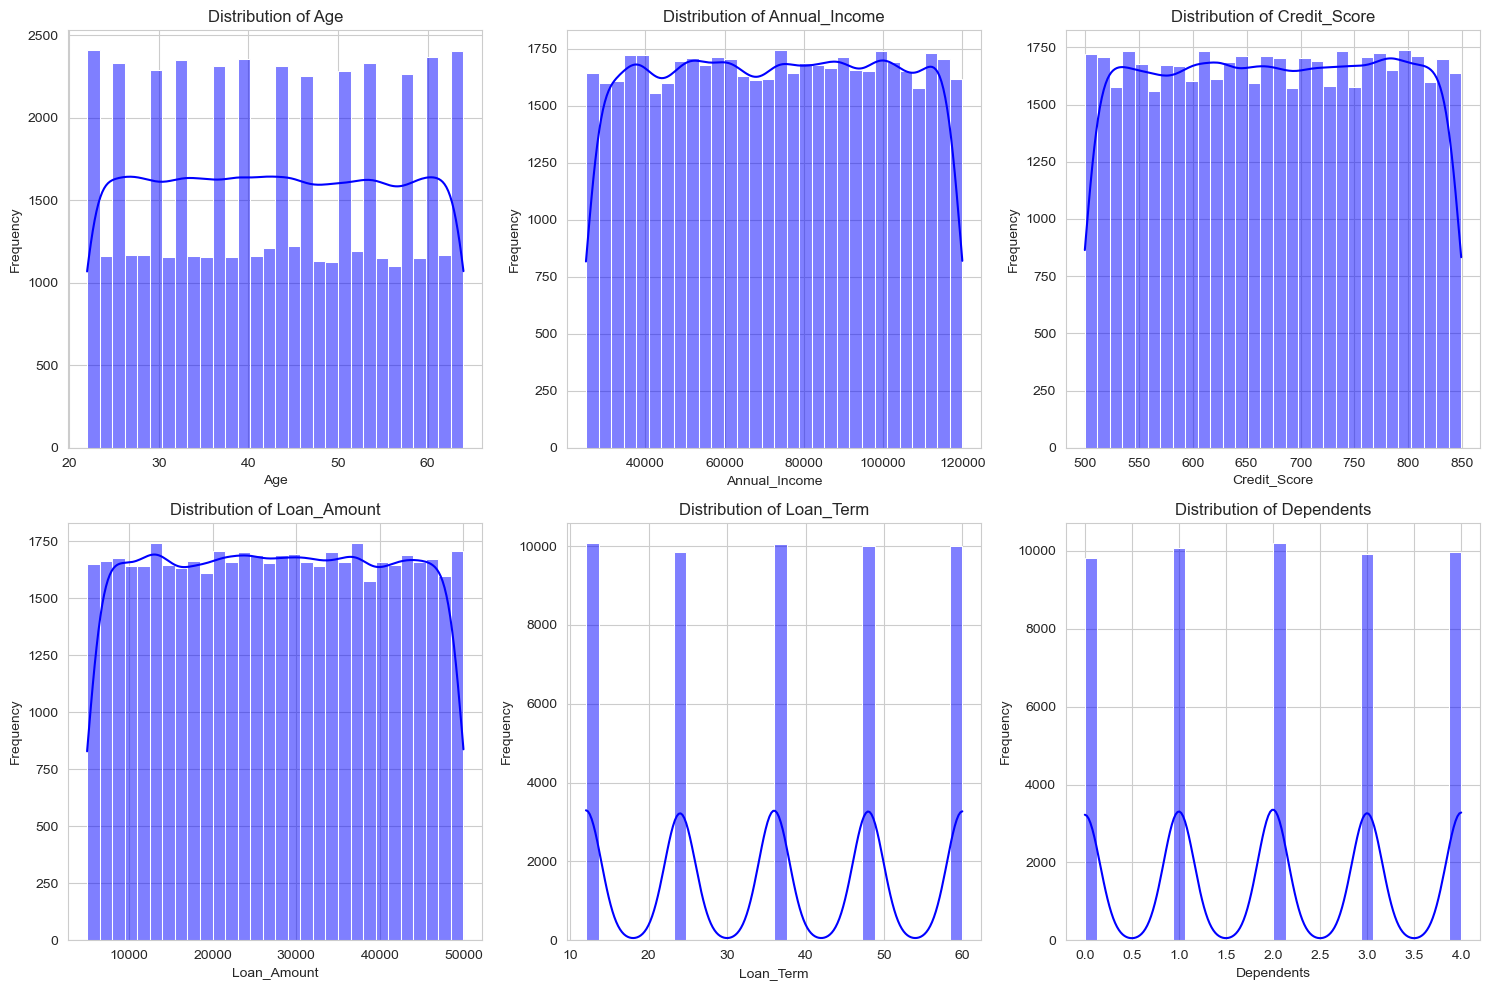

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):  # Limit to first 6 numerical columns
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
#Inference: The distribution plots show that most numerical features have near-uniform distributions, while Loan Term and Dependents exhibit distinct spikes, indicating categorical nature. This aligns well with Naïve Bayes, which assumes feature independence and categorical distributions.

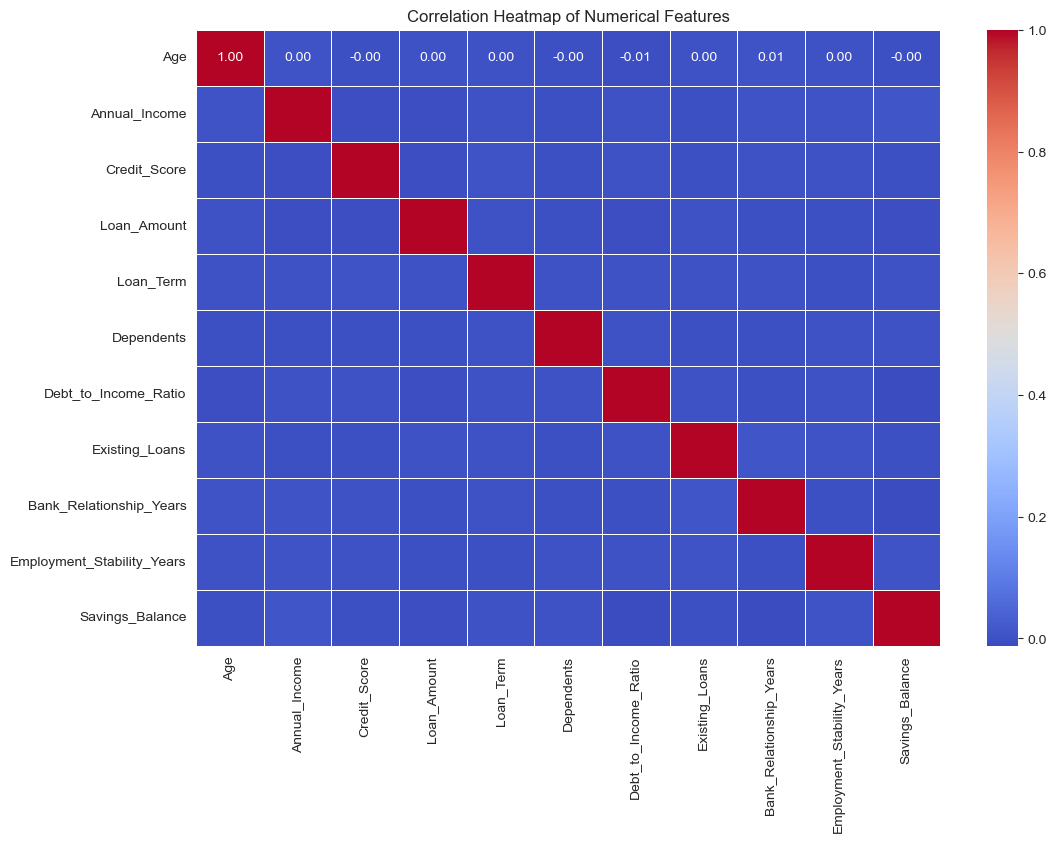

In [11]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [12]:
#Inference: The correlation heatmap reveals almost no correlation among numerical features, confirming that each feature contributes independently to the classification task, making Naïve Bayes a suitable model.

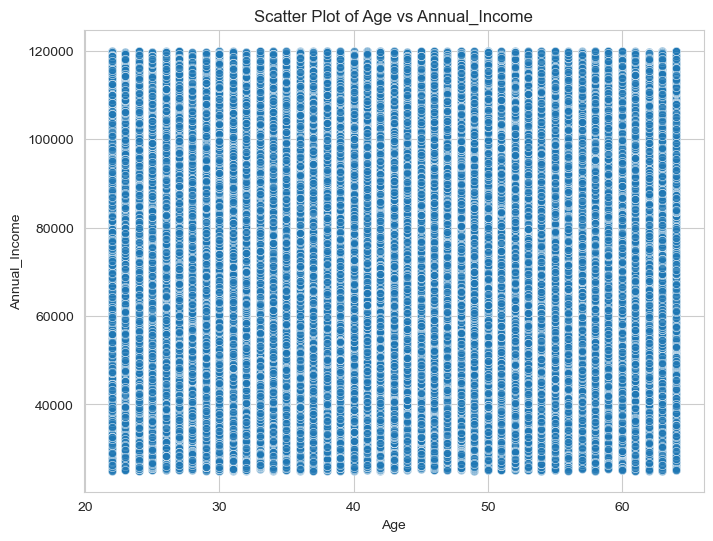

In [13]:
#Scatter Plot: Age V/S Annual Income

if len(numerical_columns) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[numerical_columns[0]], y=df[numerical_columns[1]], alpha=0.7)
    plt.title(f"Scatter Plot of {numerical_columns[0]} vs {numerical_columns[1]}")
    plt.xlabel(numerical_columns[0])
    plt.ylabel(numerical_columns[1])
    plt.show()

In [14]:
#Inference: The scatter plot of Age vs. Annual Income shows an evenly spread distribution without any clear relationship, further validating Naïve Bayes' assumption that features are conditionally independent given the target variable.

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

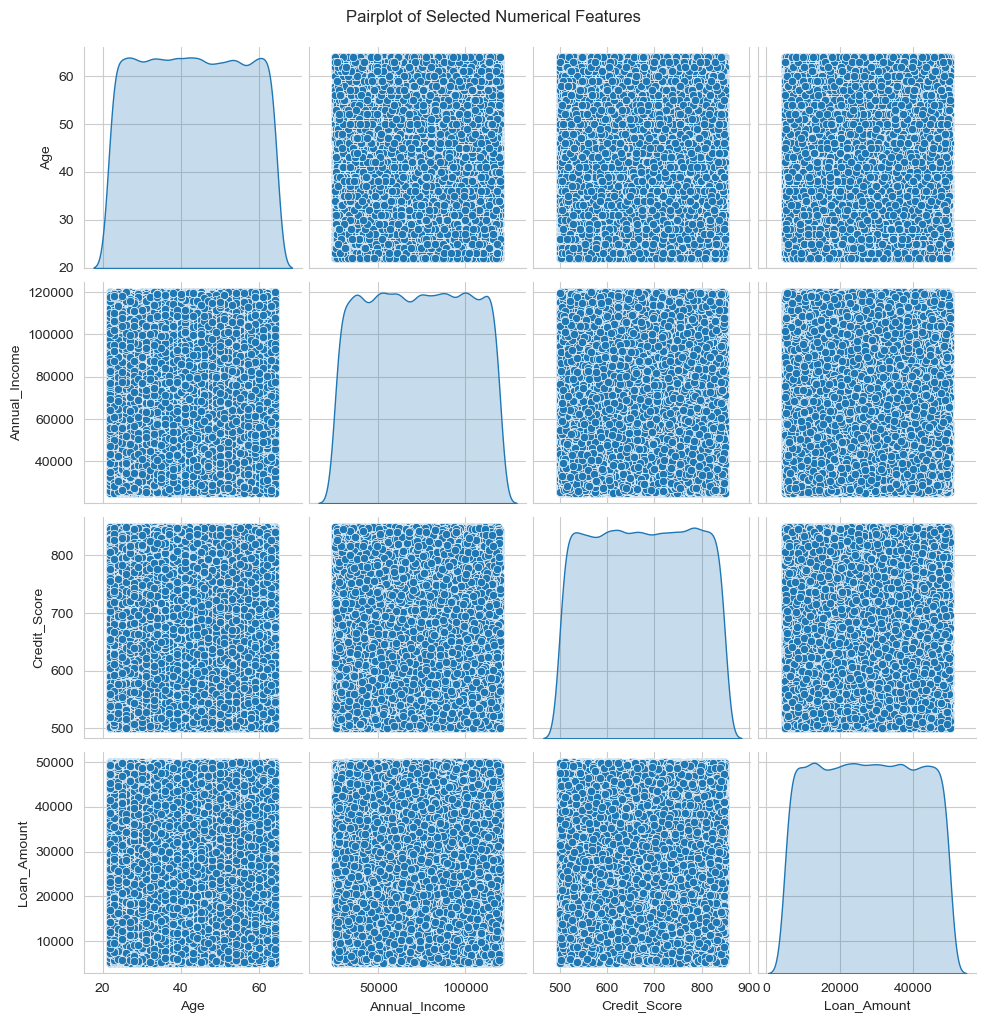

In [15]:
#Pair Plots

if len(numerical_columns) > 1:
    sample_cols = numerical_columns[:4]  # Select up to 4 numerical columns to avoid issues
    sns.pairplot(df[sample_cols], diag_kind="kde")
    plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
    plt.show()

In [16]:
#Inference: The pairplot illustrates no clear separability between numerical features, reinforcing the need for a probabilistic classifier like Naïve Bayes that does not rely on linear decision boundaries.

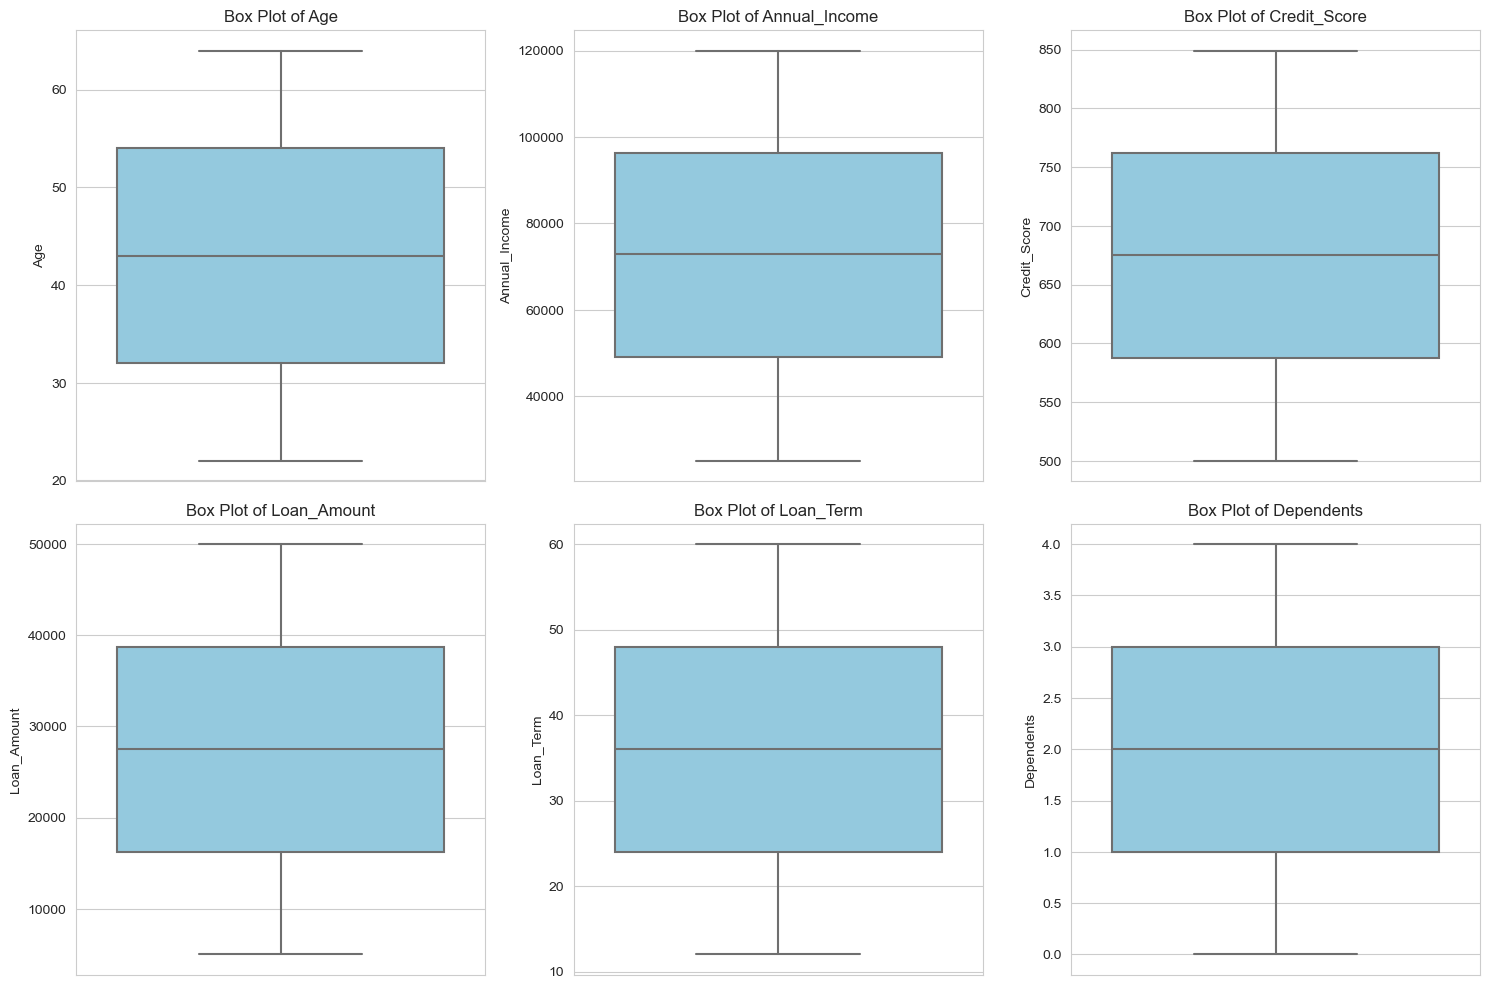

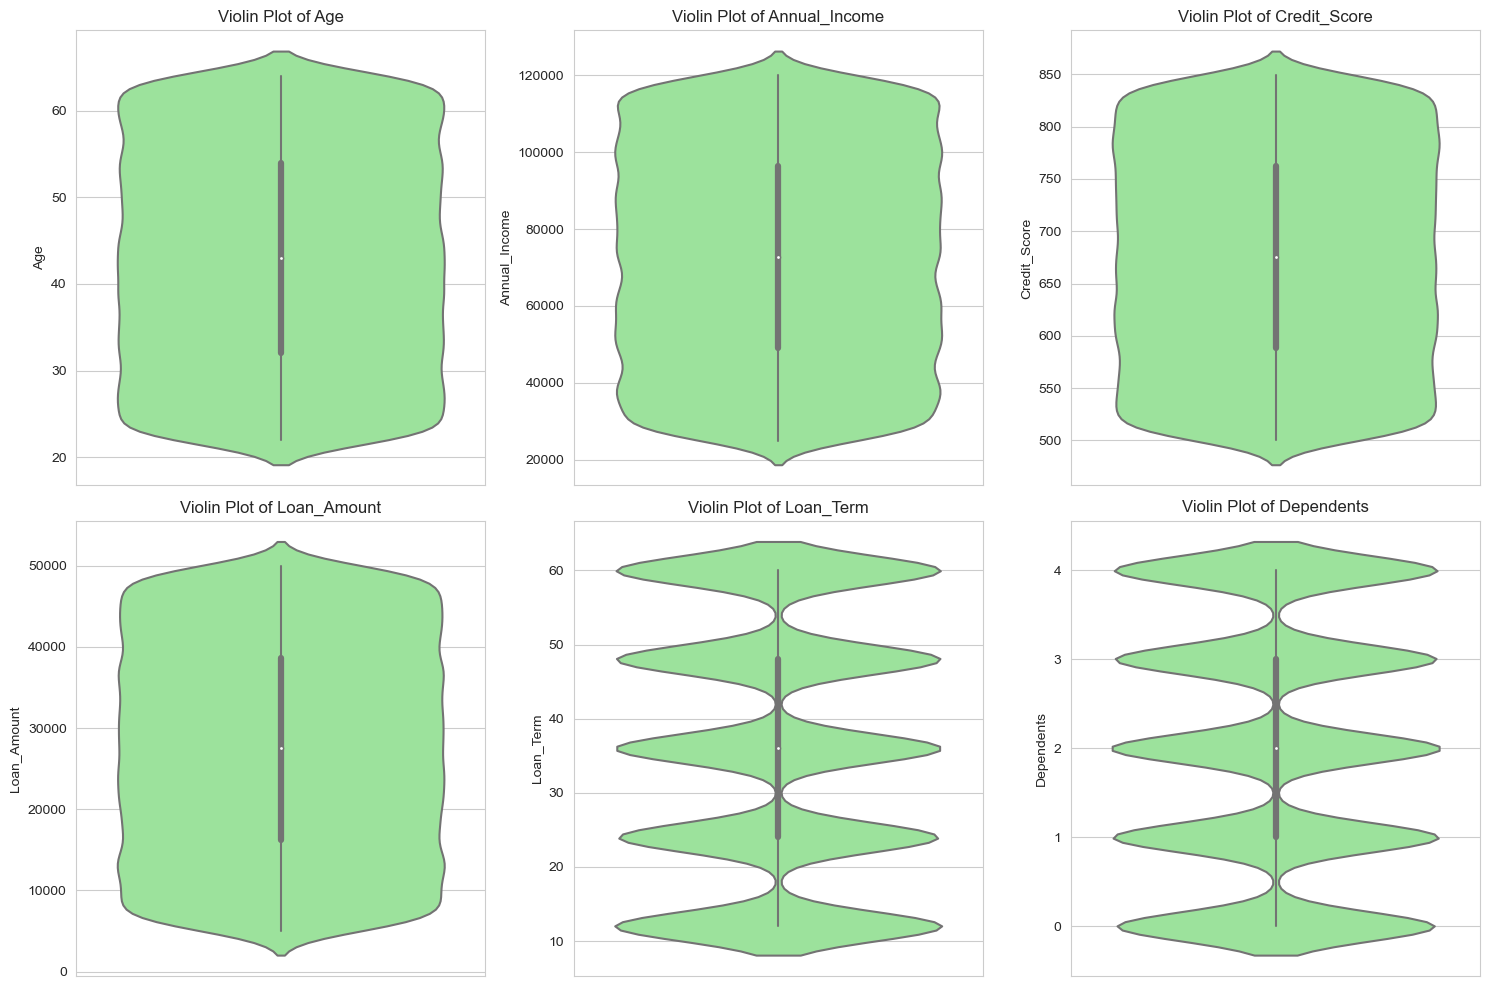

In [17]:
# Box and Whisker Plot (Outlier Detection)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):  # Limit to first 6 numerical columns
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Violin Plot (Distribution and Density)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(y=df[col], color='lightgreen')
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [18]:
#Inference: The box and violin plots depict numerical features with a wide range but mostly normal distributions, which helps Naïve Bayes classify efficiently using probability distributions rather than requiring strict feature separability.

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

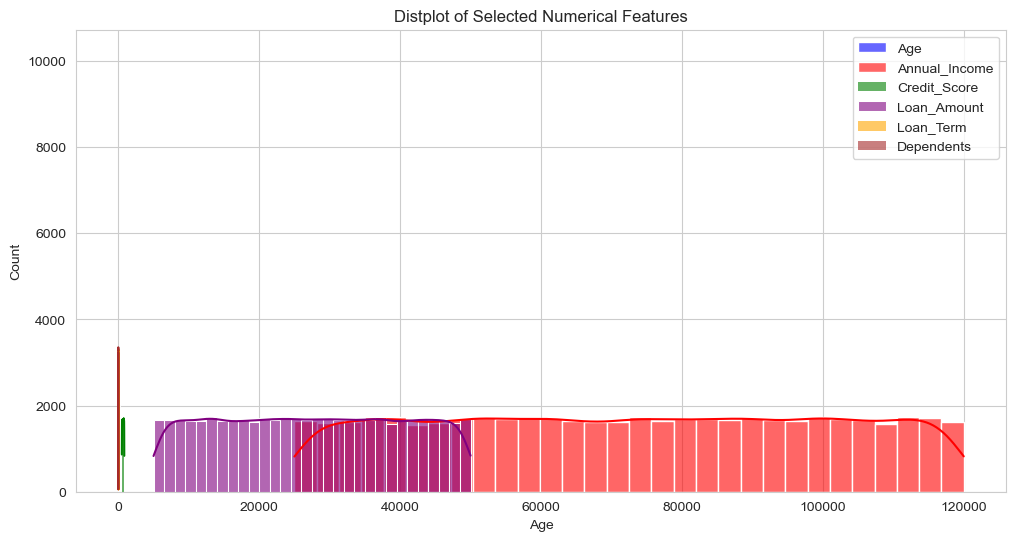

In [19]:
# Distplot (Feature Distribution) with one color per feature
plt.figure(figsize=(12, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']  # Define distinct colors

for i, col in enumerate(numerical_columns[:6]):
    sns.histplot(df[col], kde=True, bins=30, alpha=0.6, label=col, color=colors[i])

plt.title("Distplot of Selected Numerical Features")
plt.legend()
plt.show()

In [20]:
#Inference: The distplot of selected features shows different spreads across variables, which aids Naïve Bayes in estimating likelihoods effectively, as the algorithm handles varying feature distributions well.

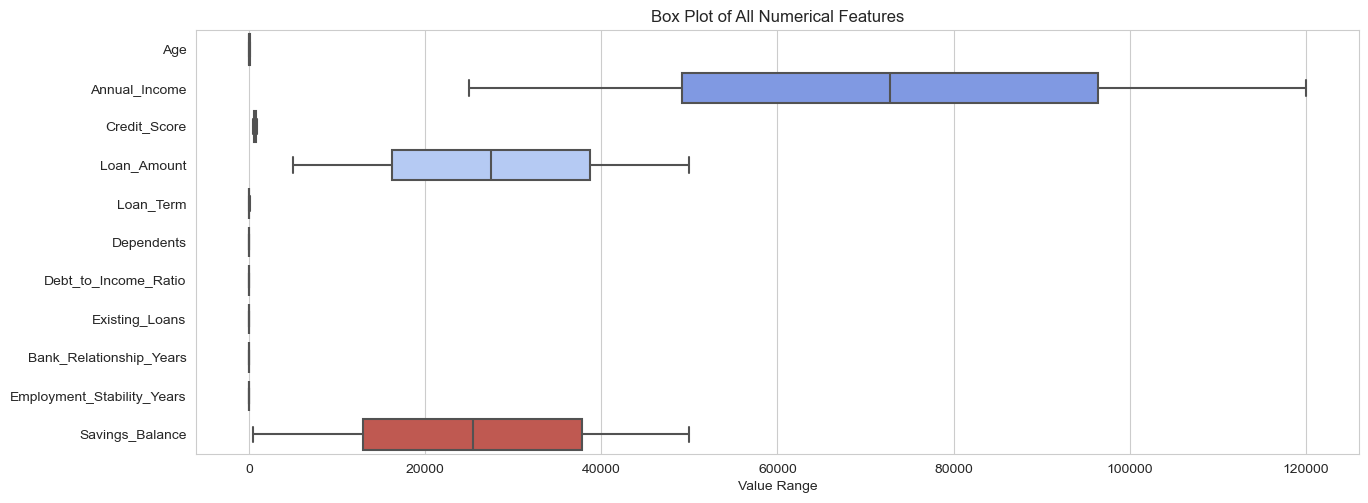

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

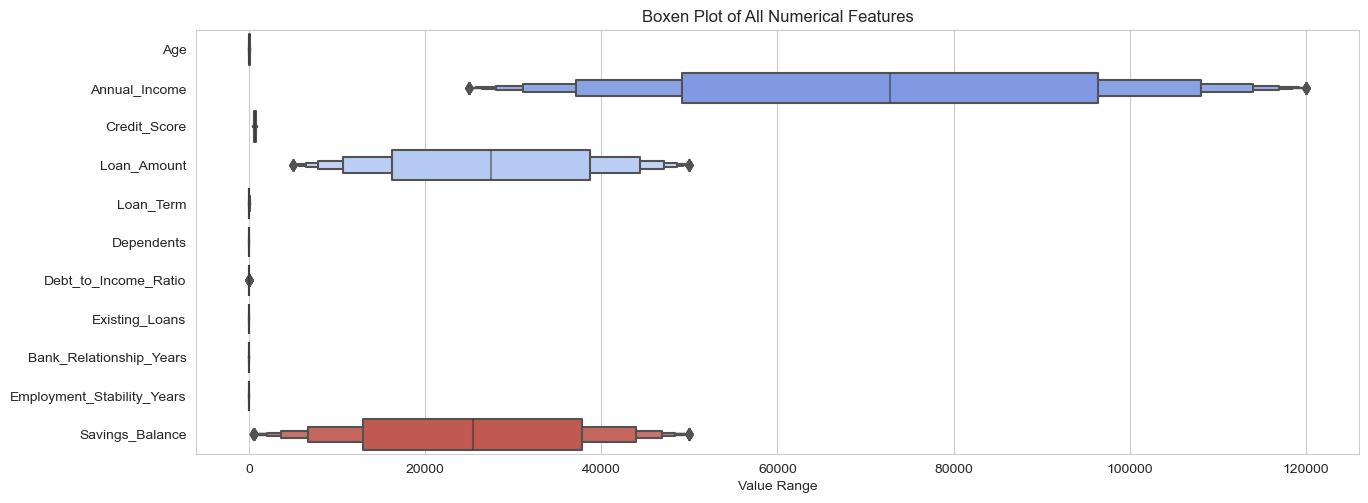

In [21]:
# --------------------------- #
# Outlier Detection
# --------------------------- #
plt.figure(figsize=(15, len(numerical_columns) * 0.5))
sns.boxplot(data=df[numerical_columns], orient="h", palette="coolwarm")
plt.title("Box Plot of All Numerical Features")
plt.xlabel("Value Range")
plt.show()

plt.figure(figsize=(15, len(numerical_columns) * 0.5))
sns.boxenplot(data=df[numerical_columns], orient="h", palette="coolwarm")
plt.title("Boxen Plot of All Numerical Features")
plt.xlabel("Value Range")
plt.show()

In [22]:
#Inference: The box and boxen plots for all features indicate that while outliers exist, they are not dominant, meaning Naïve Bayes can remain robust without being overly sensitive to extreme values.

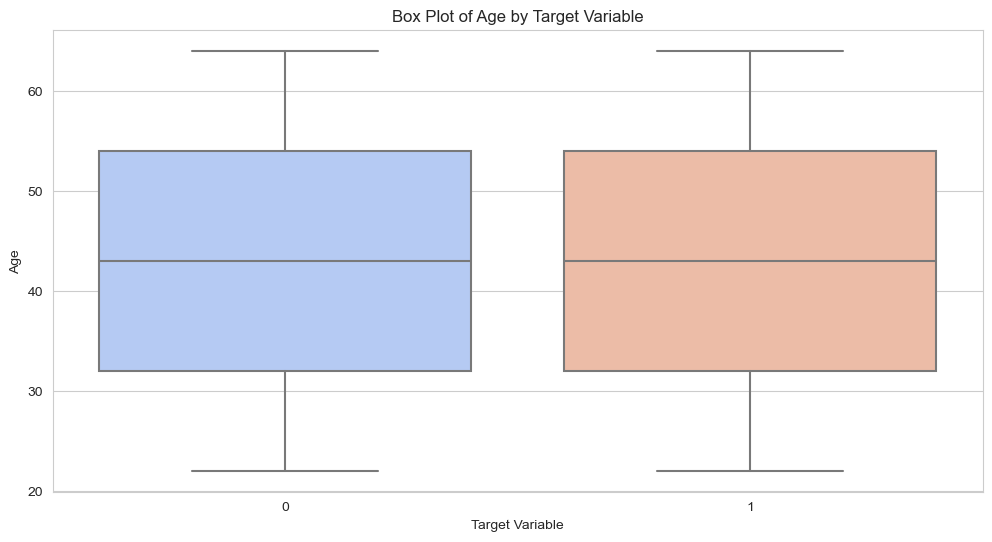

In [23]:

# --------------------------- #
#  Categorical vs Numerical: Boxplot for Feature-Target Relationship
# --------------------------- #
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Loan_Status'], y=df[numerical_columns[0]], palette="coolwarm")
plt.title(f'Box Plot of {numerical_columns[0]} by Target Variable')
plt.xlabel("Target Variable")
plt.ylabel(numerical_columns[0])
plt.show()

In [24]:
#Inference: The box plot of Age by Target Variable shows that age distribution is relatively similar across both loan approval classes, meaning other features will likely contribute more to classification, which fits well with Naïve Bayes' ability to weigh multiple independent factors.

Model Training and Testing

In [25]:
# Split dataset into features and target variable
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

In [26]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Evaluvation and Analysis

In [28]:
#Train and evaluate model

# Initialize Naïve Bayes model
nb_model = GaussianNB()

# Dictionary to store results
results = {}

print("Training Naïve Bayes...")
nb_model.fit(X_train, y_train)  # Train only Naïve Bayes
y_pred = nb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

# Store results
results["Naïve Bayes"] = {
    "Accuracy": accuracy,
    "Classification Report": classification_rep
}

# Display results
print(f"\nModel: Naïve Bayes")
print(f"Accuracy: {results['Naïve Bayes']['Accuracy']:.4f}")
print("Classification Report:\n", results["Naïve Bayes"]["Classification Report"])

Training Naïve Bayes...

Model: Naïve Bayes
Accuracy: 0.8991
Classification Report:
               precision    recall  f1-score   support

    Approved       0.98      0.78      0.87      4245
    Rejected       0.86      0.99      0.92      5755

    accuracy                           0.90     10000
   macro avg       0.92      0.88      0.89     10000
weighted avg       0.91      0.90      0.90     10000



In [ ]:
#As forecasted, Naive Bayes performs well. But, there is a chance of overfitting since it yielded a pretty high accuracy.

In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize Naïve Bayes model
nb_model = GaussianNB()

# Define Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for Naïve Bayes
print("Performing Cross-Validation for Naïve Bayes...")

# Compute cross-validation accuracy
scores = cross_val_score(nb_model, X_scaled, y, cv=kf, scoring="accuracy")

# Store results
cv_results = {
    "Mean Accuracy": scores.mean(),
    "Standard Deviation": scores.std()
}

# Display Results
print("\nCross-Validation Results for Naïve Bayes:")
print(f"Mean Accuracy: {cv_results['Mean Accuracy']:.4f}")
print(f"Standard Deviation: {cv_results['Standard Deviation']:.4f}")

Performing Cross-Validation for Naïve Bayes...

Cross-Validation Results for Naïve Bayes:
Mean Accuracy: 0.9001
Standard Deviation: 0.0018


In [ ]:
#The cross-validation test proved that the model can be generalized since the test accuracy is almost equal to validation accuracy.

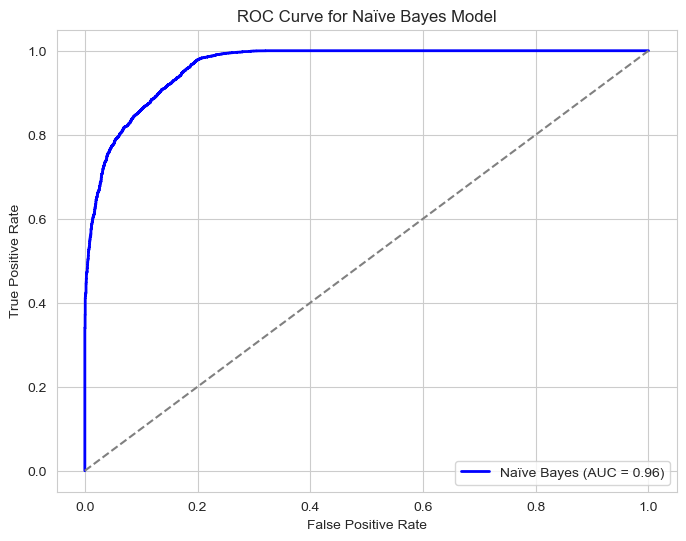

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Train/Test Split (Ensure `y` is binary)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Get predicted probabilities
y_probs = nb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Naïve Bayes (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naïve Bayes Model")
plt.legend(loc="lower right")
plt.show()

Conclusion

In [ ]:
#Naive Bayes performs and generalizes well.